<a href="https://colab.research.google.com/github/reshshah/data-science-portfolio/blob/main/Example_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn nltk bertopic sentence-transformers streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 842.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [2]:
from google.colab import files
uploaded = files.upload()

Saving example_customer_feedback_1.csv to example_customer_feedback_1.csv


In [5]:
import pandas as pd
df = pd.read_csv('example_customer_feedback_1.csv')
df.head()
len(df)

100

In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Load the dummy data
df = pd.read_csv('example_customer_feedback_1.csv')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply Sentiment Analysis
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['review_text'].apply(get_sentiment)

print(df[['review_text', 'sentiment']].head())


                                         review_text sentiment
0          Loved how simple the selling process was!  Positive
1          They answered all my questions patiently.   Neutral
2    I was disappointed by the lack of transparency.  Negative
3          The communication could have been better.  Positive
4  Excellent customer service throughout the enti...  Positive


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already
nltk.download('vader_lexicon')

# Load data
df = pd.read_csv('example_customer_feedback_1.csv')

# Initialize Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Apply Sentiment Analysis
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    compound = scores['compound']

    if compound >= 0.05:
        sentiment_label = 'Positive'
    elif compound <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    return pd.Series([scores['neg'], scores['neu'], scores['pos'], compound, sentiment_label])

# Apply the function to each review
df[['neg_score', 'neu_score', 'pos_score', 'compound_score', 'sentiment']] = df['review_text'].apply(analyze_sentiment)

# Preview the dataframe
print(df.head())

# Save to a new CSV file
output_filename = 'example_sentiment_results.csv'
df.to_csv(output_filename, index=False)

print(f'Sentiment scores saved to {output_filename}')


   review_id  customer_id  source  \
0          1          101    Chat   
1          2          102  Review   
2          3          103  Review   
3          4          104    Chat   
4          5          105    Chat   

                                         review_text      date  neg_score  \
0          Loved how simple the selling process was!  12/29/24      0.000   
1          They answered all my questions patiently.  11/23/24      0.000   
2    I was disappointed by the lack of transparency.  12/17/24      0.519   
3          The communication could have been better.   12/3/24      0.000   
4  Excellent customer service throughout the enti...   12/7/24      0.000   

   neu_score  pos_score  compound_score sentiment  
0      0.589      0.411          0.6360  Positive  
1      1.000      0.000          0.0000   Neutral  
2      0.481      0.000         -0.6597  Negative  
3      0.633      0.367          0.4404  Positive  
4      0.619      0.381          0.5719  Positive  
Se

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
from google.colab import files

# Save to a new CSV
df.to_csv("example_reviews_with_sentiment_1.csv", index=False)

# Download it from Colab
files.download("example_sentiment_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-cdae5e8cbce6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='sentiment', palette='pastel')


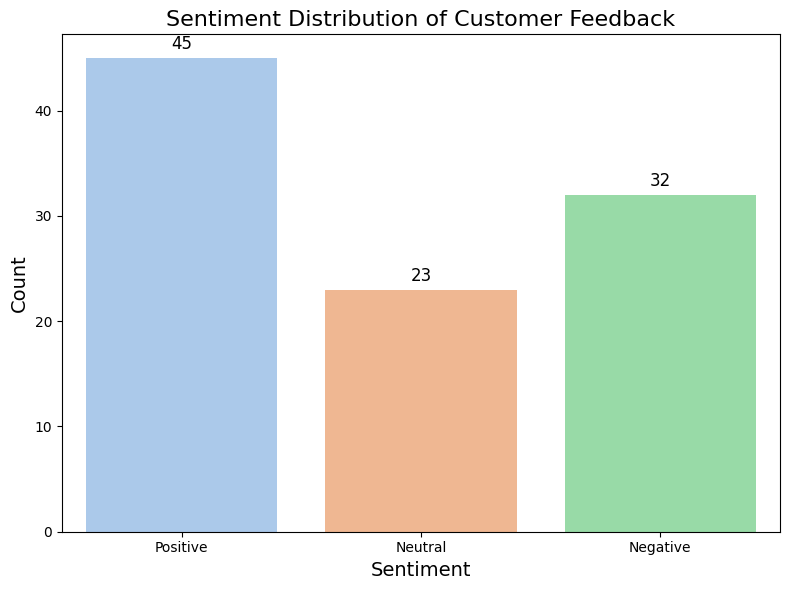

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='sentiment', palette='pastel')

# Add counts above the bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',                # Text to display
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position: center of bar top
                ha='center', va='center',  # Horizontal/vertical alignment
                fontsize=12, color='black', xytext=(0, 10),        # Offset from bar top
                textcoords='offset points')

# Customize labels and title
plt.title('Sentiment Distribution of Customer Feedback', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
